In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

In [2]:
"""
Удаление выбросов с использованием межквартильного размаха (IQR)
"""
def get_filter_df(df, col):
    # Определяем Q1 и Q3 квартили
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Вычисляем IQR
    IQR = Q3 - Q1
    
    # Определяем границы для определения выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Фильтруем выбросы
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [3]:
df_house_3 = pd.read_excel("data/house_3_local.xlsx")
max_borehole = df_house_3["тсз"].max()

# Выбор визуально лучшей скважины

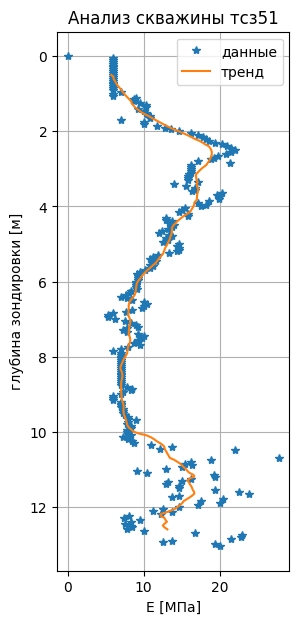

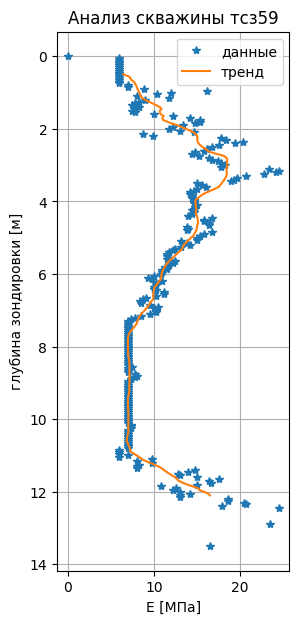

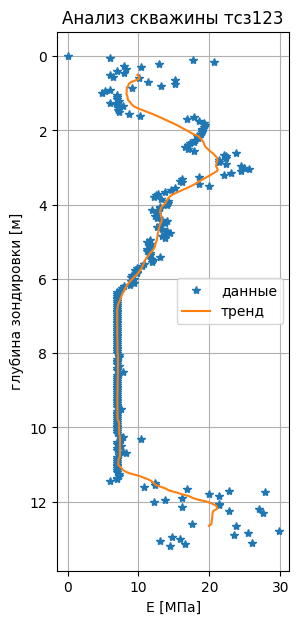

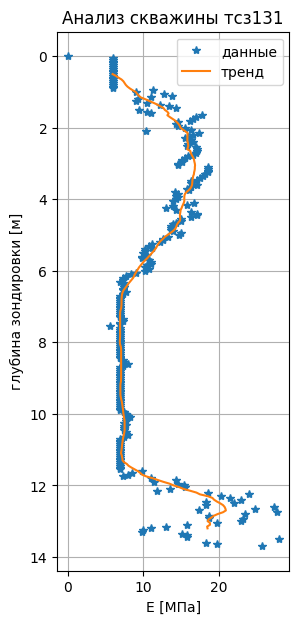

In [12]:
for i in [51, 59, 123, 131]:#df_house_3["тсз"]:

    borehole = f"тсз{i}"

    df = pd.read_excel(f"data/{borehole}.xlsx")
    df = df.loc[:, ["E", "soil_kind"]]
    df_filter = get_filter_df(df, "E")
    # Вычисление скользящего среднего для определения тренда
    window_size = 20  # Размер окна для скользящего среднего
    df_filter['Trend'] = df_filter['E'].rolling(window=window_size, center=True).mean()
    # Вычисление случайной составляющей как разность исходных данных и тренда
    df_filter['Random'] = df_filter['E'] - df_filter['Trend']
    
    plt.figure(figsize=(3, 7))
    plt.plot(df_filter["E"], df_filter.index*5/100, '*', label="данные")
    plt.plot(df_filter["Trend"], df_filter.index*5/100, '-', label="тренд")
    plt.title(f'Анализ скважины {borehole}')
    plt.ylabel('глубина зондировки [м]')
    plt.gca().invert_yaxis()
    plt.xlabel('E [МПа]')
    plt.grid()
    plt.legend()
    plt.show()

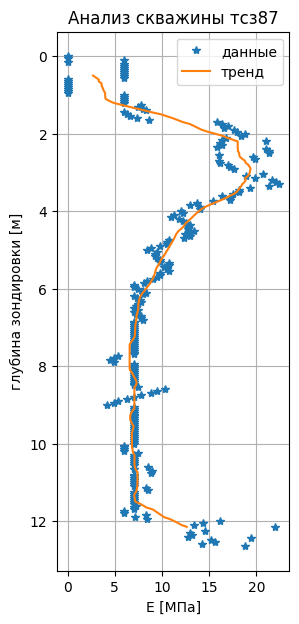

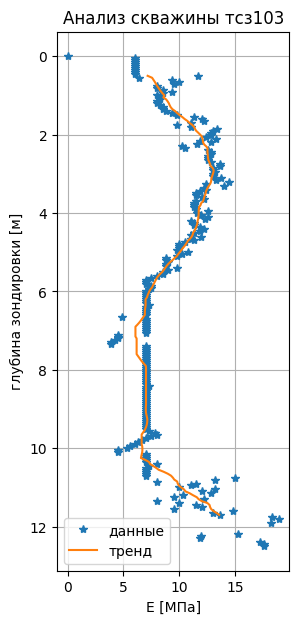

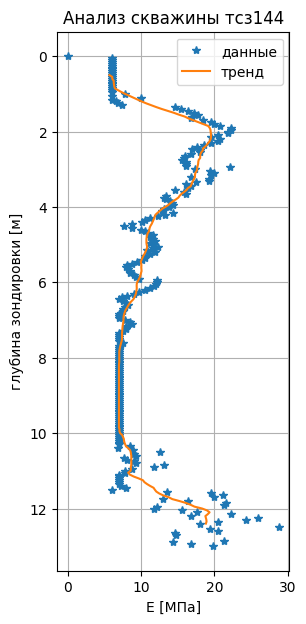

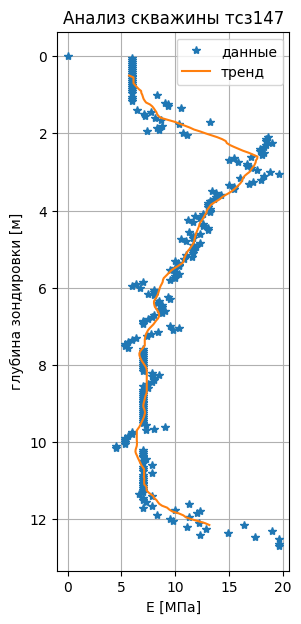

In [11]:
for i in [87, 103, 144, 147]:#df_house_3["тсз"]:

    borehole = f"тсз{i}"

    df = pd.read_excel(f"data/{borehole}.xlsx")
    df = df.loc[:, ["E", "soil_kind"]]
    df_filter = get_filter_df(df, "E")
    # Вычисление скользящего среднего для определения тренда
    window_size = 20  # Размер окна для скользящего среднего
    df_filter['Trend'] = df_filter['E'].rolling(window=window_size, center=True).mean()
    # Вычисление случайной составляющей как разность исходных данных и тренда
    df_filter['Random'] = df_filter['E'] - df_filter['Trend']
    
    plt.figure(figsize=(3, 7))
    plt.plot(df_filter["E"], df_filter.index*5/100, '*', label="данные")
    plt.plot(df_filter["Trend"], df_filter.index*5/100, '-', label="тренд")
    plt.title(f'Анализ скважины {borehole}')
    plt.ylabel('глубина зондировки [м]')
    plt.gca().invert_yaxis()
    plt.xlabel('E [МПа]')
    plt.grid()
    plt.legend()
    plt.show()

    Принять на рассмотрение скв:
        тсз87
        тсз103
        тсз144
        тсз147

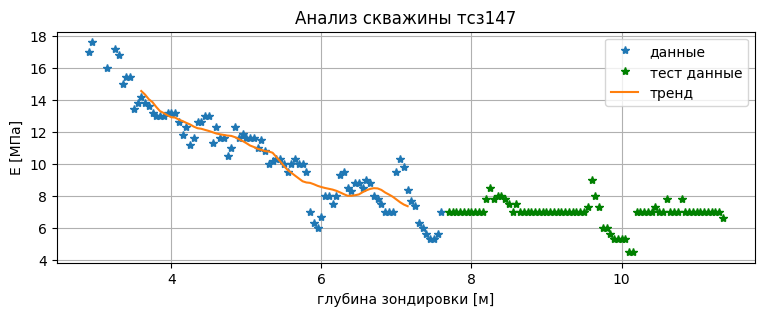

In [13]:
clay_border = [73.5, 65] # границы суглинка

for i in [147]:
    borehole = f"тсз{i}"
    z_borehole = df_house_3.query('тсз==@i')["z"].iloc[0] # абсолютная отметка устья скважины
    
    df = pd.read_excel(f"data/{borehole}.xlsx")
    df["z_sample"] = z_borehole - df["h"]
    df = df.query('z_sample < @clay_border[0] & z_sample > @clay_border[1]')
    
    df = df.loc[:, ["E", "soil_kind", "h"]]
    df_filter_all = get_filter_df(df, "E")#.query('h > 2.5')
    df_filter = df_filter_all.iloc[:91]
    df_filter_test = df_filter_all.iloc[92:]
    #df_filter = pd.concat([df_filter_all.iloc[:91], df_filter_all.iloc[128:]])
    #df_filter_test = df_filter_all.iloc[92:128]
    # Вычисление скользящего среднего для определения тренда
    window_size = 20  # Размер окна для скользящего среднего
    df_filter['Trend'] = df_filter['E'].rolling(window=window_size, center=True).mean()
    # Вычисление случайной составляющей как разность исходных данных и тренда
    df_filter['Random'] = df_filter['E'] - df_filter['Trend']
    
    plt.figure(figsize=(9, 3))
    plt.plot(df_filter["h"], df_filter["E"], '*', label="данные")
    plt.plot(df_filter_test["h"], df_filter_test["E"], '*g', label="тест данные")
    plt.plot(df_filter["h"], df_filter["Trend"], '-', label="тренд")
    plt.title(f'Анализ скважины {borehole}')
    plt.xlabel('глубина зондировки [м]')
    plt.ylabel('E [МПа]')
    plt.grid()
    plt.legend()
    plt.show()

In [6]:
df_house_3.query('тсз==147')["z"].iloc[0]

76.385

"""
Отбор 8 скважин для mathcad
"""
sample_all = pd.read_excel("data/точки_дом_3.xlsx").loc[:, ["x", "y", "h", "E"]].query('h >= 3 & h <= 10')
boreholes = pd.read_excel("data/house_3.xlsx")
top_boreholes = [51, 59, 69, 77, 105, 113, 123, 131]
sample_all = sample_all.merge(boreholes, how="left", on=["x", "y"])
sample_all.query('тсз in @top_boreholes').applymap(lambda x: str(x).replace(",", ".")).to_excel("data/boreholes_8_for_mathcad.xlsx", index=False)